About Dataset: This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

In this project I aim to capture valuable insights about this dataset, answering questions, creating graphs and interpreting them.

In [2]:
# Import the libraries
import pandas as pd
from bokeh.plotting import figure, show, row
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook


# Import the dataset
df = pd.read_csv("user_behavior_dataset.csv")

1. Is there a correlation between application usage time and battery consumption?

Objective: To evaluate whether increased application usage time is directly associated with greater battery consumption

In [3]:

# Crie um objeto ColumnDataSource com os dados
source = ColumnDataSource(data=dict(
    app_usage_time=df['App Usage Time (min/day)'],
    battery_drain=df['Battery Drain (mAh/day)']
))

# Crie o gráfico de dispersão
p = figure(title="Correlação entre tempo de uso de aplicativos e consumo de bateria",
           x_axis_label='Tempo de uso de aplicativos (min)',
           y_axis_label='Consumo de bateria (mAh)')

# Adicione os pontos de dados ao gráfico
p.circle(x='app_usage_time', y='battery_drain', size=6, source=source)

output_notebook()
show(p)


Loading BokehJS ...

Here we can see a good relation with variables Showing that the longer the usage time, the greater the battery drain.

2. Como o número de aplicativos instalados afeta o consumo de dados e o tempo de uso de tela?

In [4]:
# Creating the data source
source = ColumnDataSource(data=dict(
    num_apps=df['Number of Apps Installed'],
    screen_on_time=df['Screen On Time (hours/day)'],
    data_consumption=df['Data Usage (MB/day)']
))

# Creating the first scatter plot for screen on time
p1 = figure(title="Relationship between number of installed applications and screen time",
            x_axis_label='Number of installed applications',
            y_axis_label='Time on screen (hours/day)')

p1.circle(x='num_apps', y='screen_on_time', size=5, source=source)

# Creating the second scatter plot for data consumption
p2 = figure(title="Relationship between number of installed applications and data consumption",
            x_axis_label='Number of applications',
            y_axis_label='Data consumption (MB/day)')

p2.circle(x='num_apps', y='data_consumption', size=5, source=source)

# Show the plot
show(row(p1, p2))

Here we can see that both graphs have strong relationships with the proposed question, showing a positive result

3. Do iOS and Android users have significantly different device usage patterns?

In [5]:
# Filter to select only iOS and Android users
ios_users = df[df['Operating System'] == 'iOS']
android_users = df[df['Operating System'] == 'Android']

# Create a scatter plot
p3 = figure(title="Scatter Plot of App Usage Time and Screen On Time", x_axis_label='App Usage Time', y_axis_label='Screen On Time')

# Add the points to the plot
p3.scatter(x=ios_users['App Usage Time (min/day)'], y=ios_users['Screen On Time (hours/day)'], color='blue', legend_label='iOS')
p3.scatter(x=android_users['App Usage Time (min/day)'], y=android_users['Screen On Time (hours/day)'], color='red', legend_label='Android')

# Add a hover tool
hover = HoverTool(tooltips=[
    ("Operating System", "@sistema_operacional"),
    ("App Usage Time", "@app_usage_time"),
    ("Screen On Time", "@screen_on_time")
])
p3.add_tools(hover)

# Show the plot
show(p3)


Here we can see that both Android and iOS have similar results

4. Are there specific patterns of screen use and data consumption for each age group?

In [6]:
# Creating the data source
df_age_screeb_data = df[['Age', 'Screen On Time (hours/day)', 'Data Usage (MB/day)']]

# Creating the object
source = ColumnDataSource(data=df_age_screeb_data)

# Create the scatter plot for screen time by age
p4 = figure(title = "Screen time and data usage by age",
            x_axis_label = 'Age', y_axis_label = 'Screen On Time (hours/day)',
            x_range=(0, 100), y_range=(0, 12))

#Adding the points to the plot
p4.scatter(x='Age', y='Screen On Time (hours/day)', size=5, source=source)

# Add a second series of data of Data consume
p4.scatter(x='Age', y='Data Usage (MB)', source=source, size=10, color='red')


# Add hover to show adictional infomations
hover = HoverTool(tooltips=[
    ("Age", "@Age"),
    ("Screen Time", "@{Screen on Time (hours/day)}"),
    ("Data Usage", "@{Data Usage (MB)}")
])

p4.add_tools(hover)


#Show Plot
show(p4)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='Data Usage (MB)' [closest match: 'Data Usage (MB/day)'] {renderer: GlyphRenderer(id='p1261', ...)}


5. Is battery consumption higher in users with extreme usage behavior?

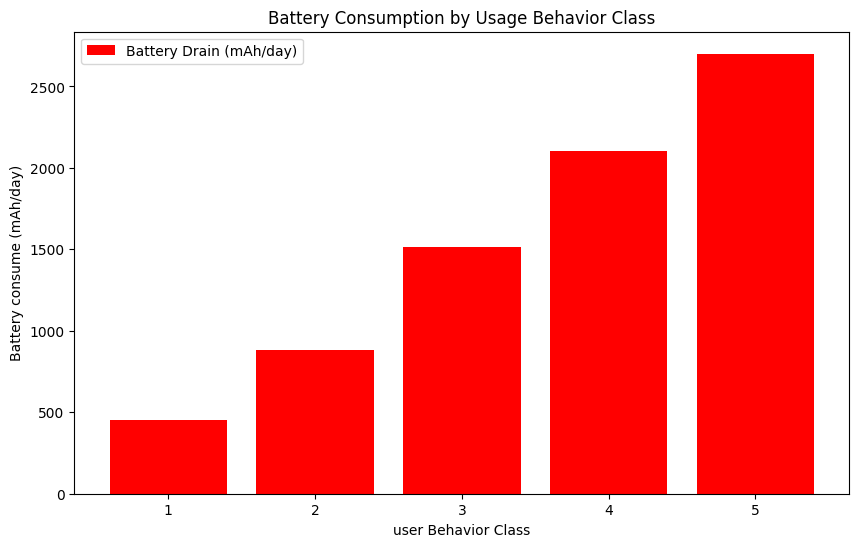

In [38]:
"""    
During the project I decided to use matplotlb instead of bokeh for some incompatibility reasons.
"""




import matplotlib.pyplot as plt

# Create a DataFrame with the desired columns
df_battery_usage = df[['User Behavior Class', 'Battery Drain (mAh/day)']]

# Agroup the DataFrame by 'User Behavior Class' and calculate the mean of 'Battery Drain (mAh/day)'
df_battery_usage_grouped = df_battery_usage.groupby('User Behavior Class')['Battery Drain (mAh/day)'].mean().reset_index()

# Create the bar chart
plt.bar(df_battery_usage_grouped['User Behavior Class'], df_battery_usage_grouped['Battery Drain (mAh/day)'], color='#ff0000')
plt.gca().set_facecolor('white')

# Adjust the plot size
plt.gcf().set_size_inches(10, 6)

# Add caption
plt.legend(['Battery Drain (mAh/day)'])

# Adjust axis title and labels
plt.title('Battery Consumption by Usage Behavior Class')
plt.xlabel('user Behavior Class')
plt.ylabel('Battery consume (mAh/day)')

# Show the Plot
plt.show()

Here we can see In the graph we can see that the greater the use, the higher the battery drain rate.

6. Which extreme factors are most strongly associated with extreme use behavior?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


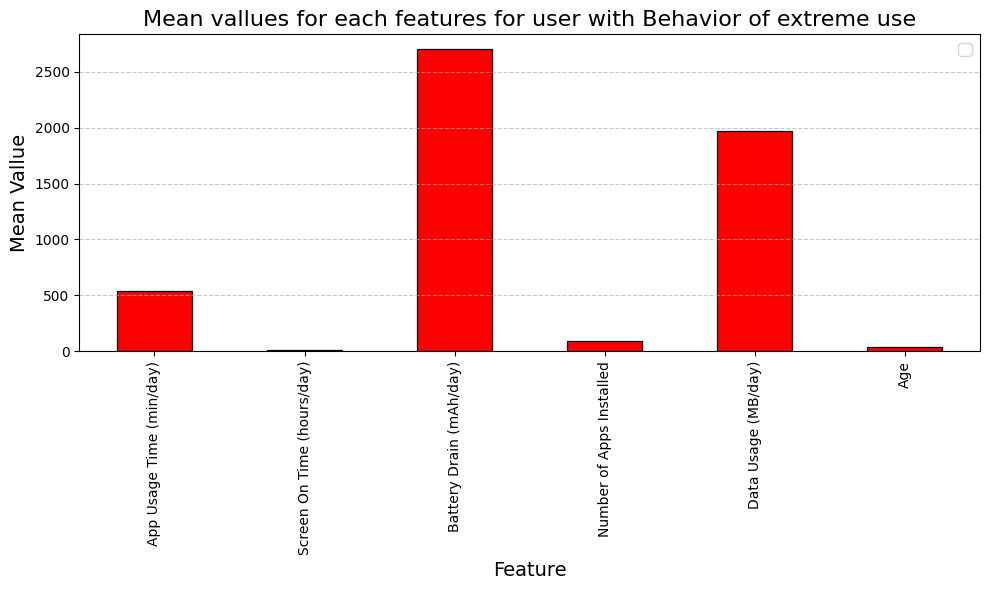

In [32]:
import matplotlib.pyplot as plt

# Filter the data for users with extreme usage behavior
extreme_users = df[df['User Behavior Class'] == 5]

# Calculate the mean values for each feature
means = extreme_users[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                       'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                       'Data Usage (MB/day)', 'Age']].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='#ff0000', edgecolor='black', linewidth=0.9)

# Add title and rotules
plt.title('Mean vallues for each features for user with Behavior of extreme use', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Mean Vallue', fontsize=14)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends 
plt.legend(loc='upper right', fontsize=12)

# Adjust the space
plt.tight_layout()

# show the plot
plt.show()

We can see above how the variables influence the extreme use of smartphones

7. Are there any device models that tend to consume more battery or data?

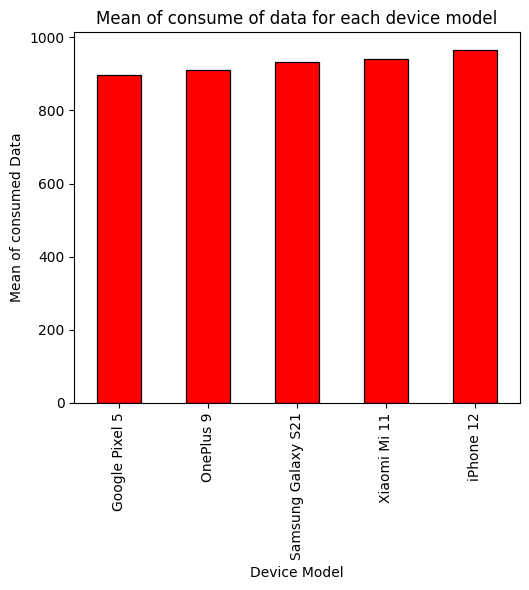

In [36]:
# Agroup the data by dispositive model
device_models = df.groupby('Device Model')

# Calculate the mean of battery consume for each device model
battery_mean = device_models['Battery Drain (mAh/day)'].mean()
data_mean = device_models['Data Usage (MB/day)'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
data_mean.plot(kind='bar', color='#ff0000', edgecolor='black', linewidth=0.9)
plt.title("Mean of consume of data for each device model")
plt.xlabel("Device Model")
plt.ylabel("Mean of consumed Data")

#Adjust the Layout
plt.tight_layout()

# Show plt
plt.show()

The graph shows that the devices that use the most memory are the iPhone 12 in first place, followed by the Xiaomi Mi 11 and Samsung Galaxy S21.

8. Which device type has the highest user behavior class?

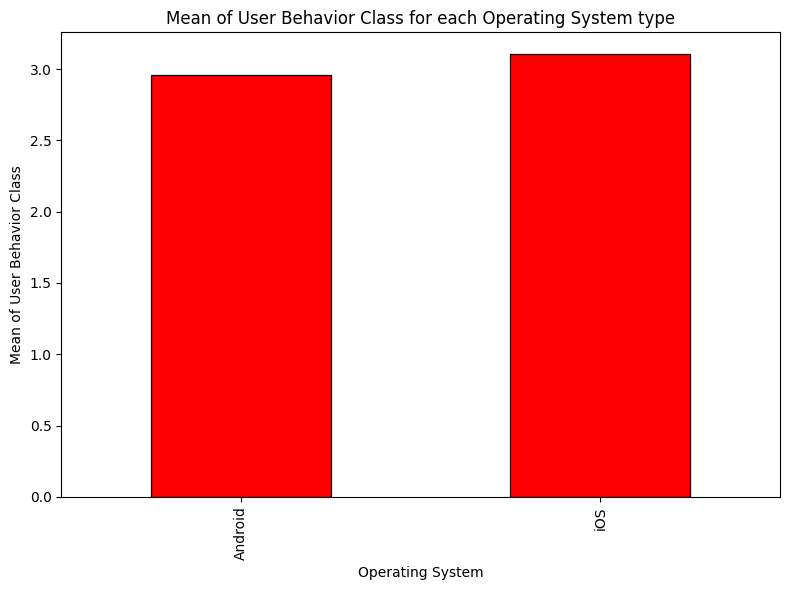

In [37]:
# Group by Operating System
device_types = df.groupby('Operating System')


# Calculate the mean of User behavior class for each device type
user_behavior_mean = device_types['User Behavior Class'].mean()

# Create the bar chart
plt.figure(figsize=(8, 6))
user_behavior_mean.plot(kind='bar', color='#ff0000', edgecolor='black', linewidth=0.9)
plt.title("Mean of User Behavior Class for each Operating System type")
plt.xlabel("Operating System")
plt.ylabel("Mean of User Behavior Class")

#Adjust the Layout
plt.tight_layout()

# Show plt
plt.show()